In [1]:
from neural_engine.nn import MLP, mse_loss
from tensorflow import keras
import numpy as np
import io
import matplotlib.pyplot as plt

(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

/Users/byteme/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


5


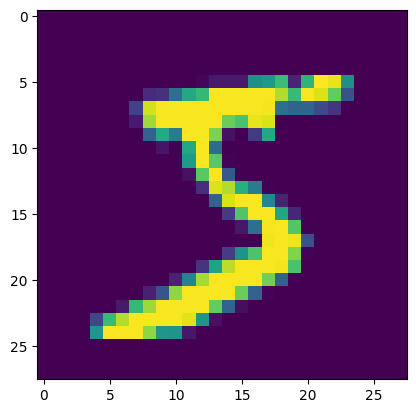

In [4]:

plt.imshow(X_train[0]) # 2D list of grayscale values ranging between 0-255 array of 28*28 = 784
print(y_train[0]) # expected output

In [3]:
flat_x_train = [[x/255 for row in mat for x in row] for mat in X_train]

In [5]:
model = MLP(784, [128,32,10])#initialize model


In [7]:
def train_model(xs, ys):
    # forward propagation
    ypred = model(xs)
    # print(ypred)
    # calculating loss
    loss = mse_loss(ys, ypred)

    for param in model.parameters():
        param.grad = 0

    # backward propagation
    loss.backward()

    # changing parameters based on gradients
    for param in model.parameters():
        param.data += -0.03*param.grad

    return loss

In [11]:
for idx, (x,y) in enumerate(zip(flat_x_train, y_train)):
    y_exp = [1 if i==y else 0 for i in range(10)]
    loss = train_model( x, y_exp)
    print(f'{idx} loss = {loss.data} number={y}')

0 loss = 10.71532526637391 number=5
1 loss = 7.696733861692503 number=0
2 loss = 6.082458940982302 number=4
3 loss = 6.06564640906424 number=1
4 loss = 8.401131583899824 number=9
5 loss = 4.96540570511431 number=2
6 loss = 6.301491616515489 number=1
7 loss = 6.705133910464566 number=3
8 loss = 7.187638939390002 number=1
9 loss = 7.033912931790281 number=4
10 loss = 5.163943865642388 number=3
11 loss = 5.750198339554195 number=5
12 loss = 10.686221441390837 number=3
13 loss = 6.795528686584653 number=6
14 loss = 7.766989363442931 number=1
15 loss = 8.09704042472015 number=7
16 loss = 4.6984357662530245 number=2
17 loss = 6.330415440413595 number=8
18 loss = 8.56547536136149 number=6
19 loss = 7.939815294158278 number=9
20 loss = 7.487008755715993 number=4
21 loss = 6.286224607789301 number=0
22 loss = 6.9349672894556464 number=9
23 loss = 5.138885860922685 number=1
24 loss = 6.755640992853215 number=1
25 loss = 6.056797386409225 number=2
26 loss = 7.878027891168743 number=4
27 loss = 7.

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x102730190>>
Traceback (most recent call last):
  File "/Users/byteme/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py", line 781, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x102730190>>
Traceback (most recent call last):
  File "/Users/byteme/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py", line 781, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


4571 loss = 2.118665684969372 number=7
4572 loss = 0.9742262563697649 number=6
4573 loss = 1.7477286475561398 number=5
4574 loss = 3.3008312155317823 number=2
4575 loss = 2.638301975717039 number=7
4576 loss = 0.6762551334529274 number=2


KeyboardInterrupt: 

In [ ]:
fitting = 0
for exp_num, img in zip(y_test, X_test):
    res = model([p/255 for row in img for p in row])
    print(res)
    res_num = max(range(len(res)), key=lambda i: res[i].data)
    fitting = fitting+1 if res_num==exp_num else fitting
    print(exp_num, res_num)

print(f'success rate: {fitting/len(y_test) * 100}%')

[Value(data=-0.12392095423686776, grad=0, _op=tanh, label=), Value(data=0.027806488837352636, grad=0, _op=tanh, label=), Value(data=0.8632623721104129, grad=0, _op=tanh, label=), Value(data=-0.2274611009183191, grad=0, _op=tanh, label=), Value(data=0.14776692625046783, grad=0, _op=tanh, label=), Value(data=-0.3778981059419799, grad=0, _op=tanh, label=), Value(data=-0.08901341838240716, grad=0, _op=tanh, label=), Value(data=0.8476381450209722, grad=0, _op=tanh, label=), Value(data=0.2742092275912578, grad=0, _op=tanh, label=), Value(data=0.1301110808818899, grad=0, _op=tanh, label=)]
7 2
[Value(data=-0.2057422100126392, grad=0, _op=tanh, label=), Value(data=0.19110206376801367, grad=0, _op=tanh, label=), Value(data=0.946028686873941, grad=0, _op=tanh, label=), Value(data=0.04181291496822173, grad=0, _op=tanh, label=), Value(data=-0.055161011581883794, grad=0, _op=tanh, label=), Value(data=0.029451753268696753, grad=0, _op=tanh, label=), Value(data=0.11965309634969878, grad=0, _op=tanh, 

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x102730190>>
Traceback (most recent call last):
  File "/Users/byteme/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py", line 781, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


[Value(data=-0.3910755851286819, grad=0, _op=tanh, label=), Value(data=0.16387351278103338, grad=0, _op=tanh, label=), Value(data=0.8875457339380887, grad=0, _op=tanh, label=), Value(data=-0.008949849346597306, grad=0, _op=tanh, label=), Value(data=-0.28591472543346286, grad=0, _op=tanh, label=), Value(data=-0.37230300681246015, grad=0, _op=tanh, label=), Value(data=0.09220223415217112, grad=0, _op=tanh, label=), Value(data=0.8168012979162115, grad=0, _op=tanh, label=), Value(data=0.17240341939727974, grad=0, _op=tanh, label=), Value(data=-0.19564979217235304, grad=0, _op=tanh, label=)]
5 2
[Value(data=0.07602025789577, grad=0, _op=tanh, label=), Value(data=0.027094306791612875, grad=0, _op=tanh, label=), Value(data=0.940379469976979, grad=0, _op=tanh, label=), Value(data=-0.13391656885015568, grad=0, _op=tanh, label=), Value(data=0.43871045491634625, grad=0, _op=tanh, label=), Value(data=0.06212142641035131, grad=0, _op=tanh, label=), Value(data=-0.023236841237476137, grad=0, _op=tanh